In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn import metrics

In [2]:
df = pd.read_json("./results/multinli_transforms_bertscore_dev_matched.jsonl", lines=True).set_index('pairID')
df_annot_labels = pd.read_json("./annotations/gold.json")
df_model_labels = pd.read_json("./results/deberta_large_labels.jsonl", lines=True).set_index('pairID')
df_model_transform_labels = pd.read_json("./results/deberta_large_transform_labels.jsonl", lines=True).set_index('pairID')
df = df.join(df_annot_labels).join(df_model_labels).join(df_model_transform_labels).dropna()
df = df[df['gold_label'] == df['transform_label']]

In [3]:
df_label_mismatch = df[df['deberta_large_label'] != df['deberta_large_transform_label']]

In [4]:
df_label_mismatch[df_label_mismatch['style'] == 'emb']

,annotator_labels,genre,gold_label,promptID,sentence1,sentence1_binary_parse,sentence1_parse,sentence2,sentence2_binary_parse,sentence2_parse,...,sentence1_transform2,sentence2_transform1,sentence2_transform2,sentence1_transform1_bertscore,sentence1_transform2_bertscore,sentence2_transform1_bertscore,sentence2_transform2_bertscore,transform_label,deberta_large_label,deberta_large_transform_label
pairID,,,,,,,,,,,,,,,,,,,,,
42024e,"[entailment, entailment, entailment, entailmen...",fiction,entailment,42024,A man like me cannot fail… .,( ( A man ) ( ( ( like ( me ( ( can not ) fail...,(ROOT (S (NP (DT A) (NN man)) (VP (VBP like) (...,A man such as me cannot fail...,( ( ( A man ) ( such ( as me ) ) ) ( ( ( can n...,(ROOT (S (NP (NP (DT A) (NN man)) (PP (JJ such...,...,My unwavering determination and unyielding spi...,A gentleman of my stature and caliber is incap...,It is beyond the scope of possibility for an i...,0.877694,0.868970,0.905030,0.876492,entailment,entailment,neutral
81837e,"[entailment, entailment, entailment, entailmen...",fiction,entailment,81837,"I've thought it well over """,( I ( 've ( ( ( thought it ) ( well over ) ) '...,(ROOT (S (NP (PRP I)) (VP (VBP 've) (VP (VBN t...,I thought about it long and hard.,( I ( ( ( thought ( about it ) ) ( ( long and ...,(ROOT (S (NP (PRP I)) (VP (VBD thought) (PP (I...,...,"Having duly deliberated and cogitated,",My contemplation went on for an extended durat...,"With deep and profound introspection, I have g...",0.841639,0.839337,0.900627,0.897521,entailment,neutral,entailment
129185e,"[entailment, entailment, entailment, neutral, ...",fiction,entailment,129185,Lincoln glared.,( Lincoln ( glared . ) ),(ROOT (S (NP (NNP Lincoln)) (VP (VBD glared)) ...,The man glared.,( ( The man ) ( glared . ) ),(ROOT (S (NP (DT The) (NN man)) (VP (VBD glare...,...,With an icy glare that could freeze the braves...,The gentleman's steely gaze pierced through hi...,A deep and penetrating stare emanated from the...,0.888789,0.866704,0.910868,0.903988,entailment,entailment,neutral
21287n,"[neutral, entailment, neutral, entailment, neu...",fiction,neutral,21287,"The rain had stopped, but the green glow paint...","( ( The rain ) ( ( had ( ( ( stopped , ) but )...",(ROOT (S (NP (DT The) (NN rain)) (VP (VBD had)...,The green glow painted everything around them ...,( ( ( ( The ( ( green ( glow painted ) ) every...,(ROOT (S (NP (NP (DT The) (ADJP (NN green) (NN...,...,"Although the rainfall had ceased, a vibrant em...",A verdant iridescence illuminated the entire e...,The termination of a vigorous rain shower caus...,0.930838,0.919325,0.910052,0.885418,neutral,neutral,entailment
14545n,"[neutral, contradiction, neutral, neutral, neu...",slate,neutral,14545,"After three days of using the gel, my mouth ha...",( ( After ( ( three days ) ( of ( using ( the ...,(ROOT (S (PP (IN After) (NP (NP (CD three) (NN...,They had just undergone oral surgery.,( They ( ( ( had just ) ( undergone ( oral sur...,(ROOT (S (NP (PRP They)) (VP (VBD had) (ADVP (...,...,Following a trinity of rotations of this earth...,The duo had recently experienced the intricate...,With mouths still tender from the delicate ope...,0.900004,0.907326,0.912616,0.888505,neutral,neutral,contradiction
43094c,"[contradiction, contradiction, neutral, neutra...",slate,contradiction,43094,Time 's cover package considers what makes a g...,( ( ( Time 's ) ( cover package ) ) ( ( consid...,(ROOT (S (NP (NP (NNP Time) (POS 's)) (NN cove...,Time's cover package is about how most college...,( ( ( Time 's ) ( cover package ) ) ( ( is ( a...,(ROOT (S (NP (NP (NNP Time) (POS 's)) (NN cove...,...,The focus of Time magazine's current cover pac...,The cover package of Time's latest publication...,Time's recent feature article discusses the da...,0.889801,0.892082,0.907642,0.904766,contradiction,contradiction,neutral
142966e,"[entailment, entailment, entailment, entailmen...",government,entailment,142966,When I was in school I really liked Virginia W...,( ( ( When 

In [5]:
print(len(df[df['gold_label'] == df['deberta_large_label']]) / len(df))

0.8883928571428571


In [6]:
print(len(df[df['transform_label'] == df['deberta_large_transform_label']]) / len(df))

0.8348214285714286


In [7]:
for x, y in df.groupby('style'):
    print(x)
    print('MNLI:', len(y[y['gold_label'] == y['deberta_large_label']]), '/', len(y))
    print('Tran:', len(y[y['transform_label'] == y['deberta_large_transform_label']]), '/', len(y))

emb
MNLI: 129 / 141
Tran: 115 / 141
pir
MNLI: 132 / 150
Tran: 127 / 150
sha
MNLI: 137 / 157
Tran: 132 / 157


In [8]:
actual = df['gold_label'].tolist()
mnli_predicted = df['deberta_large_label'].tolist()
transform_predicted = df['deberta_large_transform_label'].tolist()

In [9]:
from collections import Counter
print(Counter(actual))

Counter({'neutral': 181, 'entailment': 139, 'contradiction': 128})


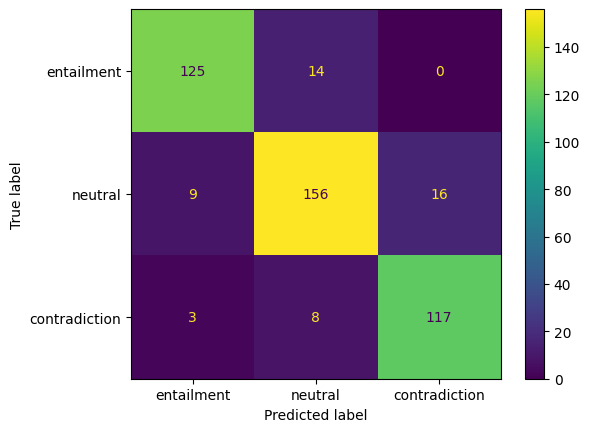

In [10]:
confusion_matrix = metrics.confusion_matrix(actual, mnli_predicted, labels=['entailment', 'neutral', 'contradiction'])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=['entailment', 'neutral', 'contradiction'])

cm_display.plot()
plt.show()

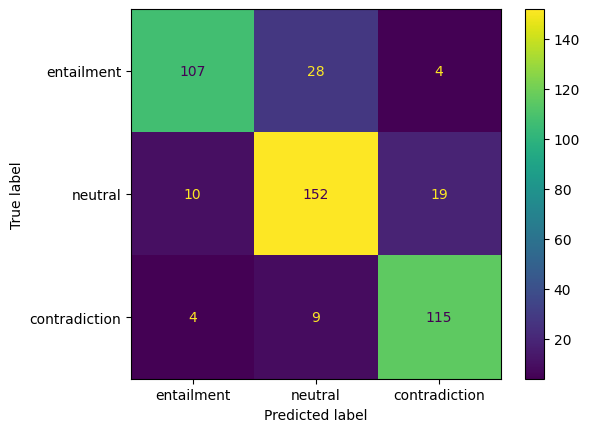

In [11]:
confusion_matrix = metrics.confusion_matrix(actual, transform_predicted, labels=['entailment', 'neutral', 'contradiction'])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=['entailment', 'neutral', 'contradiction'])

cm_display.plot()
plt.show()

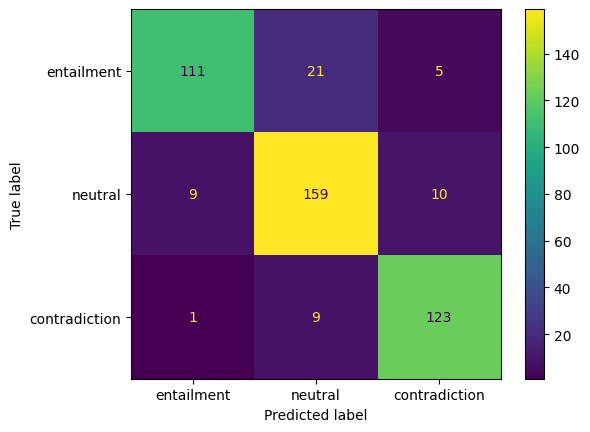

In [12]:
confusion_matrix = metrics.confusion_matrix(mnli_predicted, transform_predicted, labels=['entailment', 'neutral', 'contradiction'])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=['entailment', 'neutral', 'contradiction'])

cm_display.plot()
plt.show()

In [13]:
df_changed_label = df[df['gold_label'] == df['deberta_large_label']]
df_changed_label = df_changed_label[df_changed_label['deberta_large_label'] != df_changed_label['deberta_large_transform_label']]
df_changed_label

,annotator_labels,genre,gold_label,promptID,sentence1,sentence1_binary_parse,sentence1_parse,sentence2,sentence2_binary_parse,sentence2_parse,...,sentence1_transform2,sentence2_transform1,sentence2_transform2,sentence1_transform1_bertscore,sentence1_transform2_bertscore,sentence2_transform1_bertscore,sentence2_transform2_bertscore,transform_label,deberta_large_label,deberta_large_transform_label
pairID,,,,,,,,,,,,,,,,,,,,,
73734e,"[entailment, entailment, entailment, entailmen...",fiction,entailment,73734,"You and your friends are not welcome here, sai...",( ( ( ( You and ) ( your friends ) ) ( ( ( are...,(ROOT (SINV (S (NP (NP (PRP You)) (CC and) (NP...,Severn said the people were not welcome there.,( Severn ( ( said ( ( the people ) ( ( were ( ...,(ROOT (S (NP (NNP Severn)) (VP (VBD said) (SBA...,...,"Ye be not be havin' a welcome in these parts, ...",Severn be sayin' that the scallywags be not be...,"The land be not open to the landlubbers, as Se...",0.942287,0.892992,0.877748,0.846792,entailment,entailment,neutral
69141e,"[entailment, entailment, entailment, entailmen...",travel,entailment,69141,It was replaced in 1910 by the famous old pont...,( It ( ( was ( ( replaced ( in 1910 ) ) ( by (...,(ROOT (S (NP (PRP It)) (VP (VBD was) (VP (VBN ...,The famous old pontoon bridge with its seafood...,( ( ( The ( famous ( old ( pontoon bridge ) ) ...,(ROOT (S (NP (NP (DT The) (JJ famous) (JJ old)...,...,'Twas replaced in 1910 me hearties by th' famo...,Thar famous ol' pontoon bridge wit' its seafoo...,Th' notorious ancient pontoon bridge wit' its ...,0.921927,0.926414,0.951812,0.951840,entailment,entailment,neutral
48454c,"[contradiction, neutral, contradiction, neutra...",slate,neutral,48454,These revelations were embarrassing to Clinton...,( ( ( ( ( These revelations ) ( ( ( ( ( ( were...,(ROOT (S (S (NP (DT These) (NNS revelations)) ...,Clinton's supporters were pleased with how the...,( ( ( Clinton 's ) supporters ) ( ( were ( ple...,(ROOT (S (NP (NP (NNP Clinton) (POS 's)) (NNS ...,...,These revelations be makin' Clinton's enemies ...,"Arrr, Clinton's crew were well pleased wit' ho...",The hearties o' Clinton were happy wit' how th...,0.940187,0.939573,0.909912,0.917795,neutral,neutral,contradiction
102572e,"[entailment, entailment, neutral, entailment, ...",travel,entailment,102572,9th circa b.c.First signs of pre-Roman Etruscans,( ( 9th circa ) ( ( b.c.First signs ) ( of ( p...,(ROOT (NP (NP (JJ 9th) (NN circa)) (NP (NP (JJ...,First evidence of pre-Roman Etruscans.,( ( ( First evidence ) ( of ( pre-Roman Etrusc...,(ROOT (NP (NP (JJ First) (NN evidence)) (PP (I...,...,9th year in th' cirrrrrrrrca. Signs o' pre-Rom...,"First evidence o' pre-Roman Etruscans, arrr!",'Tis th' first prove o' th' pre-Roman Etruscan...,0.982111,0.864956,0.935846,0.876725,entailment,entailment,neutral
17667n,"[neutral, neutral, neutral, neutral, neutral]",slate,neutral,17667,He fled in his car when cops arrived and led t...,( He ( ( ( fled ( in ( his car ) ) ) ( when ( ...,(ROOT (S (NP (PRP He)) (VP (VBD fled) (PP (IN ...,He crashed his car because the tires burst.,( He ( ( ( crashed ( his car ) ) ( because ( t...,(ROOT (S (NP (PRP He)) (VP (VBD crashed) (NP (...,...,He bolted in his wheeled ship when the lawmen ...,He scuppered his vessel 'cause the tires blew ...,He wrecked his landlubber carriage 'cause the ...,0.931891,0.952039,0.931680,0.910149,neutral,neutral,contradiction
82491n,"[neutral, neutral, neutral, neutral, neutral]",government,neutral,82491,Programs in Michigan and the District of Colum...,( ( ( ( Programs ( in Michigan ) ) and ) ( ( t...,(ROOT (S (NP (NP (NP (NNP Programs)) (PP (IN i...,The one-year grant terms are paid out in cash.,( ( The ( one-year ( grant terms ) ) ) ( ( are...,(ROOT (S (NP (DT The) (JJ one-year) (NN grant)...,...,Shiver me timbers! Programs in Michigan and th...,The one-year booty terms be paid out in doublo...,The one-year grant terms be settled in pieces ...,0.900919,0.905288,0.920251,0.911803,neutral,neutral,

In [14]:
df_changed = df_changed_label[['style', 'genre', 'deberta_large_label', 'deberta_large_transform_label', 'sentence1', 'sentence2',]]
df_changed['sentence1_transform'] = [row['sentence1_transform1'] if row['sentence1_transform1_bertscore'] > row['sentence1_transform2_bertscore'] else row['sentence1_transform2'] for index, row in df_changed_label.iterrows()]
df_changed['sentence2_transform'] = [row['sentence2_transform1'] if row['sentence2_transform1_bertscore'] > row['sentence2_transform2_bertscore'] else row['sentence2_transform2'] for index, row in df_changed_label.iterrows()]
df_changed = df_changed.rename(columns={'deberta_large_label': 'label', 'deberta_large_transform_label': 'transform_label'})

/tmp/ipykernel_14921/4178079923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_changed['sentence1_transform'] = [row['sentence1_transform1'] if row['sentence1_transform1_bertscore'] > row['sentence1_transform2_bertscore'] else row['sentence1_transform2'] for index, row in df_changed_label.iterrows()]
/tmp/ipykernel_14921/4178079923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_changed['sentence2_transform'] = [row['sentence2_transform1'] if row['sentence2_transform1_bertscore'] > row['sente

In [17]:
for index, row in sorted(df_changed.iterrows(), key=lambda x: x[1]['style'] + x[1]['genre']):
    print(f"{row['style']}, {row['genre']} ({index})")
    print(row['sentence1'])
    print(row['sentence2'])
    print()
    print(row['sentence1_transform'])
    print(row['sentence2_transform'])
    print()
    print(f"{row['label']} -> {row['transform_label']}")
    print("\n####################\n")

emb, fiction (42024e)
A man like me cannot fail… .
A man such as me cannot fail...

For a resilient fellow such as myself, the prospect of faltering remains a mere fantasy.
A gentleman of my stature and caliber is incapable of experiencing defeat...

entailment -> neutral

####################

emb, fiction (129185e)
Lincoln glared.
The man glared.

Lincoln's stern gaze was fixed with a fiery intensity, piercing through the air with a steely glare.
The gentleman's steely gaze pierced through his intended target.

entailment -> neutral

####################

emb, fiction (21287n)
The rain had stopped, but the green glow painted everything around them.
The green glow painted everything around them after the heavy rain had stopped.

The downpour had subsided, yet a verdant aura enveloped their surroundings.
A verdant iridescence illuminated the entire environment following the cessation of a downpour that had drenched the area earlier.

neutral -> entailment

####################

emb, fi